## Imports and global variables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

module_path = os.path.abspath(os.path.join('..\..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [3]:
from funcs import *

In [4]:
diseases = ('C0003873', 
            'C0019193',
            'C0033578',
            'C0919267',
            'C0917816')

## Read Data + Save

In [5]:
human_data(file='data/BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt',
           save_file='data/processed/homo_preprocess.tsv', correct=False)

Nodes:  19618
Edges:  665061


In [6]:
for disease in diseases:
    print(f'Saving file for {disease}')
    disease_data(file='data/curated_gene_disease_associations.tsv',
                 disease_id=disease)
    print('===================')

Saving file for C0003873
Saving file for C0019193
Saving file for C0033578
Saving file for C0919267
Saving file for C0917816


In [7]:
generate_PPI(in_file='data/processed/homo_preprocess.tsv', out_file='data/processed/PPI.txt')

## Read Data + Save

In [8]:
for disease in diseases:
    print(disease)
    data_overview(human_file='data/processed/homo_preprocess.tsv',
                  disease_file=f'data/{disease}/disease{disease}.tsv')
    print('===================')

C0003873
Number of genes associated with the disease: 174
Classes of the disease: ['C17;C05;C20']
Number of genes present in the interactome: 173
Largest connected component: 83
Number of genes in the interactome: 19618
Missing gene: {6556}
C0019193
Number of genes associated with the disease: 404
Classes of the disease: ['C06;C25']
Number of genes present in the interactome: 321
Largest connected component: 230
Number of genes in the interactome: 19618
Missing gene: {407055, 442901, 442904, 442905, 442906, 442909, 442910, 442912, 619552, 619556, 574501, 574506, 574508, 100616247, 724030, 100616258, 100616259, 574030, 100126313, 100126334, 100616357, 100616376, 102466247, 3274, 100422867, 768218, 102466270, 100313838, 494323, 100616437, 494335, 102465802, 100302115, 102465833, 100302142, 100302145, 102465858, 723779, 100302149, 100422991, 100302174, 100500847, 100302197, 406902, 693120, 693122, 693124, 406919, 406920, 100302218, 100302221, 406940, 406941, 406942, 100302236, 100302240, 

In [20]:
split_files_diffusion_heat(seeds='data/seed.txt', disease=disease, k=10)

## Data Overview

In [9]:
interactome_df = pd.read_csv('data/processed/homo_preprocess.tsv', sep='\t')
interactome_g = nx.from_pandas_edgelist(interactome_df, source='A',
                                        target='B')

C0003873
Number of genes associated with the disease: 174
Classes of the desease: ['C17;C05;C20']
Number of genes present in the interactome: 173
Largest connected component: 83
C0019193
Number of genes associated with the disease: 404
Classes of the desease: ['C06;C25']
Number of genes present in the interactome: 321
Largest connected component: 230
C0033578
Number of genes associated with the disease: 616
Classes of the desease: ['C04;C12']
Number of genes present in the interactome: 613
Largest connected component: 550
C0919267
Number of genes associated with the disease: 134
Classes of the desease: ['C04;C13;C19']
Number of genes present in the interactome: 133
Largest connected component: 111
C0917816
Number of genes associated with the disease: 139
Classes of the desease: ['C23;C10;F03;F01']
Number of genes present in the interactome: 139
Largest connected component: 54


In [10]:
for i in diseases:
    split_files_diffusion_heat(seeds='data/seed'+i+'.txt', disease=i, k=5)

19618

In [11]:
tsv_to_txt(tsv_file='data/homo_preprocess.tsv', txt_file='data/homo_preprocess_new.txt')

665061

## Algorithms

In [5]:
for disease in diseases:
    if not os.path.exists(f'data/results/{disease}'):
        os.mkdir(f'data/results/{disease}')

In [ ]:
MCL_hyper('data/homo_preprocess.tsv', start=18, end=23)

In [6]:
n_iter_diamond_diable = {'C0003873':180, 
                         'C0019193':330,
                         'C0033578':620,
                         'C0919267':140,
                         'C0917816':140}

In [14]:
for disease in diseases:
    print(disease)
    DIAMOND(network_file='data/processed/PPI.txt', seed_file=f'data/{disease}/seeds_{disease}.txt', n=n_iter_diamond_diable[disease], 
            alpha=1, out_file=f'data/results/{disease}/diamond_{disease}.txt')
    print('===================')

C0003873
DIAMOnD(): ignoring 1 of 174 seed genes that are not in the network

 results have been saved to 'data/results/C0003873/diamond_C0003873.txt' 

C0019193
DIAMOnD(): ignoring 83 of 404 seed genes that are not in the network

 results have been saved to 'data/results/C0019193/diamond_C0019193.txt' 

C0033578
DIAMOnD(): ignoring 3 of 616 seed genes that are not in the network

 results have been saved to 'data/results/C0033578/diamond_C0033578.txt' 

C0919267
DIAMOnD(): ignoring 1 of 134 seed genes that are not in the network

 results have been saved to 'data/results/C0919267/diamond_C0919267.txt' 

C0917816

 results have been saved to 'data/results/C0917816/diamond_C0917816.txt' 



In [15]:
for disease in diseases:
    print(disease)
    DIABLE(network_file='data/processed/PPI.txt', seed_file=f'data/{disease}/seeds_{disease}.txt', n=n_iter_diamond_diable[disease], 
           alpha=1, out_file=f'data/results/{disease}/diable_{disease}.txt')
    print('===================')

C0003873
DiaBLE(): ignoring 1 of 174 seed genes that are not in the network

 results have been saved to 'data/results/C0003873/diable_C0003873.txt' 

C0019193
DiaBLE(): ignoring 83 of 404 seed genes that are not in the network

 results have been saved to 'data/results/C0019193/diable_C0019193.txt' 

C0033578
DiaBLE(): ignoring 3 of 616 seed genes that are not in the network

 results have been saved to 'data/results/C0033578/diable_C0033578.txt' 

C0919267
DiaBLE(): ignoring 1 of 134 seed genes that are not in the network

 results have been saved to 'data/results/C0919267/diable_C0919267.txt' 

C0917816

 results have been saved to 'data/results/C0917816/diable_C0917816.txt' 



In [16]:
for disease in diseases:
    print(disease)
    RANDOM_WALK_WITH_RESTART(network_file='data/processed/PPI.txt', seed_file=f'data/{disease}/seeds_{disease}.txt', r=0.7, 
                             score_thr=0, tol=1e-6, out_file=f'data/results/{disease}/r_walk_{disease}.txt')
    print('===================')

C0003873
RANDOM_WALK_WITH_RESTART(): ignoring 1 of 174 seed genes that are not in the network

 results have been saved to 'data/results/C0003873/r_walk_C0003873.txt' 

C0019193
RANDOM_WALK_WITH_RESTART(): ignoring 83 of 404 seed genes that are not in the network

 results have been saved to 'data/results/C0019193/r_walk_C0019193.txt' 

C0033578
RANDOM_WALK_WITH_RESTART(): ignoring 3 of 616 seed genes that are not in the network

 results have been saved to 'data/results/C0033578/r_walk_C0033578.txt' 

C0919267
RANDOM_WALK_WITH_RESTART(): ignoring 1 of 134 seed genes that are not in the network

 results have been saved to 'data/results/C0919267/r_walk_C0919267.txt' 

C0917816

 results have been saved to 'data/results/C0917816/r_walk_C0917816.txt' 



## 5-fold cross validation

In [17]:
from imported_code.diamond import DIAMOnD

In [18]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_diamond_{disease}.json',
        'extended_disease_file':None,
        'disease':disease,
        'func_args':{
            'max_number_of_added_nodes':n_iter_diamond_diable[disease],
            'alpha':1,
            'outfile':'./data/results/kfold_tmp.txt'
        }
    }

    metrics = k_fold(DIAMOnD, compute_metrics, k=5, extended_val=False, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


In [19]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_diable_{disease}.json',
        'extended_disease_file':None,
        'disease':disease,
        'func_args':{
            'max_number_of_added_nodes':n_iter_diamond_diable[disease],
            'alpha':1,
            'outfile':'./data/results/kfold_tmp.txt'
        }
    }

    metrics = k_fold(DiaBLE, compute_metrics, k=5, extended_val=False, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


In [20]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_r_walk_{disease}.json',
        'extended_disease_file':None,
        'disease':disease,
        'func_args':{
            'r':0.7, 
            'score_thr':0, 
            'tol':1e-6, 
            'sorted_nodes_only':True
        }   
    }

    metrics = k_fold(random_walk_wr, compute_metrics, k=5, extended_val=False, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


In [43]:
for i in diseases:
    MCL_metric = k_fold_MCL(human_file='data/homo_preprocess.tsv',
                            network_file='data/PPI.txt',
                            metric_func=compute_metrics_MCL,
                            extended_disease_file='data/all_gene_disease_associations.tsv',
                            metrics_file='data/'+i+'.json',
                            k=5, disease=i, extended_validation=False)

Number of clusters: 2


c:\Users\juanm\Documents\Master\Data Science\3_Semester\Bioinformatics\Project\BI-Project\funcs.py:627: RuntimeWarning: invalid value encountered in double_scalars
  return metrics


Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2
Number of clusters: 2


In [ ]:
for i in diseases:
    res = diffusion_heat(path='diffusion_heat/'+i+'/')
    diffusion_heat_metric = k_fold_diffusion_heat(network_file='data/PPI.txt', dict_res=res, 
                                                  metric_func=compute_metrics, 
                                                  extended_disease_file='data/all_gene_disease_associations.tsv',
                                                  disease=i, extended_validation=False, metrics_file='data/'+i+'.json',
                                                  k=5, disease=i, extended_validation=False)

## Extended validation

In [7]:
from imported_code.diamond import DIAMOnD

In [9]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_ext_diamond_{disease}.json',
        'extended_disease_file':'data/all_gene_disease_associations.tsv',
        'disease':disease,
        'func_args':{
            'max_number_of_added_nodes':n_iter_diamond_diable[disease],
            'alpha':1,
            'outfile':'./data/results/kfold_tmp.txt'
        }
    }

    metrics = k_fold(DIAMOnD, compute_metrics, k=5, extended_val=True, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


In [12]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_ext_diable_{disease}.json',
        'extended_disease_file':'data/all_gene_disease_associations.tsv',
        'disease':disease,
        'func_args':{
            'max_number_of_added_nodes':n_iter_diamond_diable[disease],
            'alpha':1,
            'outfile':'./data/results/kfold_tmp.txt'
        }
    }

    metrics = k_fold(DiaBLE, compute_metrics, k=5, extended_val=True, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


In [11]:
for disease in diseases:
    print(disease)

    kwargs = {
        'network_file':'data/processed/PPI.txt', 
        'seed_file':f'data/{disease}/seeds_{disease}.txt',
        'metrics_file':f'data/results/{disease}/metrics_ext_r_walk_{disease}.json',
        'extended_disease_file':'data/all_gene_disease_associations.tsv',
        'disease':disease,
        'func_args':{
            'r':0.7, 
            'score_thr':0, 
            'tol':1e-6, 
            'sorted_nodes_only':True
        }
    }

    metrics = k_fold(random_walk_wr, compute_metrics, k=5, extended_val=True, **kwargs)
    print('===================')

C0003873
C0019193
C0033578
C0919267
C0917816


## Results' visualization

In [5]:
def prepare_results_for_latex(results_file):
    """
    Prepare the results of an algorithm for a disease for the LaTeX visualization
    """
    alg_name_regx = re.compile('(?<=metrics_)[^_ext](.+)(?=_)|(?<=ext_)(.+)(?=_)')
    alg_name = re.search(alg_name_regx, results_file).group(0).upper()
    results = pd.read_json(results_file, orient='index').set_axis(['avg', 'std'], axis=1)
    if 'extended_val' in results.index:
        results.drop(['extended_val'], axis=0, inplace=True)
    results[alg_name] = (results['avg'] * 100).round(decimals=2).astype('str') + '±' + (results['std'] * 100).round(decimals=2).astype('str')
    results.drop(['avg', 'std'], axis=1, inplace=True)
    results.index = results.index.str.replace(re.compile('(_at(_k)?_)'), '@').str.capitalize()
    results.index = results.index.str.split('@', expand=True)
    results.index.rename(['Metric', '@'], inplace=True)
    results.reset_index(inplace=True)
    results['@'] = results['@'].astype(int)
    results.sort_values(['@', 'Metric'], inplace=True)
    results.set_index(['@', 'Metric'], inplace=True)
    return results

In [6]:
def prepare_results_for_summary(results_file, col='avg'):
    """
    Prepare the results of an algorithm for a disease for the plot visualization
    """
    alg_name_regx = re.compile('(?<=metrics_)[^_ext](.+)(?=_)|(?<=ext_)(.+)(?=_)')
    alg_name = re.search(alg_name_regx, results_file).group(0).upper()
    results = pd.read_json(results_file, orient='index').set_axis(['avg', 'std'], axis=1)
    if 'extended_val' in results.index:
        results.drop(['extended_val'], axis=0, inplace=True)
    results[alg_name] = (results[col] * 100).round(decimals=2)
    results.drop(['avg', 'std'], axis=1, inplace=True)
    results.index = results.index.str.replace(re.compile('(_at(_k)?_)'), '@').str.capitalize()
    results.index = results.index.str.split('@', expand=True)
    results.index.rename(['Metric', '@'], inplace=True)
    results.reset_index(inplace=True)
    results['@'] = results['@'].astype(int)
    results.sort_values(['@', 'Metric'], inplace=True)
    results.set_index(['@', 'Metric'], inplace=True)
    return results

In [7]:
def join_results(results_files, func=prepare_results_for_latex, col='avg'):
    """
    """
    results_list = []
    for results_file in results_files:
        results = func(results_file, col)
        results_list.append(results)
    return pd.concat(results_list, axis=1, join='inner')


In [8]:
def print_latex(results):
    """
    """
    if not isinstance(results, pd.DataFrame):
        results = join_results(results)
    header = [r'\textbf{Diff. Heat}', r'\textbf{RW WR}', 
              r'\textbf{Diamond}', r'\textbf{Diable}', r'\textbf{E.Diff. Heat}', r'\textbf{E.RW WR}', 
              r'\textbf{E.Diamond}', r'\textbf{E.Diable}']
    results.columns = header
    results.index = results.index.set_levels(results.index.levels[2].str.replace('Ndcg', 'NDCG').str.replace('-score', '') \
                                    .str.replace('Precision', 'P').str.replace('Recall', 'R'), level=2)
    latex = results.to_latex('data/results/longtable.tex', bold_rows=True, escape=False, multicolumn=True, multirow=True, longtable=True)
    return latex

In [9]:
def get_avg_std_res(diseases, normal_extended=(True, False)):
    """
    """
    df_avg_list = []
    df_std_list = []

    algorithms = ['heat','r_walk', 'diamond', 'diable']
    for disease in diseases:
        if normal_extended[0] and normal_extended[1]:
            results_files = [f'data/results/{disease}/metrics_{algorithm}_{disease}.json' for algorithm in algorithms]
            results_files += [f'data/results/extended/metrics_ext_{algorithm}_{disease}.json' for algorithm in algorithms]
        elif normal_extended[0]:
            results_files = [f'data/results/{disease}/metrics_{algorithm}_{disease}.json' for algorithm in algorithms]
        elif normal_extended[1]:
            results_files = [f'data/results/extended/metrics_ext_{algorithm}_{disease}.json' for algorithm in algorithms]
        else:
            raise NotImplementedError
        df_avg_list.append(join_results(results_files, func=prepare_results_for_summary, col='avg').reset_index())
        df_std_list.append(join_results(results_files, func=prepare_results_for_summary, col='std').reset_index())

    df_avg = pd.concat(df_avg_list, ignore_index=True)
    df_std = pd.concat(df_std_list, ignore_index=True)

    return df_avg, df_std

In [10]:
def replace_cutoff_symbol(df):
    """
    """
    symbols = {
        '17':'n/10', '43':'n/4', '86':'n/2', '173':'n', # C0003873
        '32':'n/10', '80':'n/4', '160':'n/2', '321':'n', # C0019193
        '61':'n/10', '153':'n/4', '306':'n/2', '613':'n', # C0033578
        '13':'n/10', '33':'n/4', '66':'n/2', '133':'n', # C0919267
        '34':'n/4', '69':'n/2', '139':'n' # C0917816
    }
    df['@'] = df['@'].astype(str)
    df = df.replace({'@':symbols})

    return df

In [11]:
def aggregate_results(df_avg, df_std, how='str'):
    """
    """
    algorithms = ['HEAT','R_WALK', 'DIAMOND', 'DIABLE']
    df = df_avg.copy().set_index(['@', 'Metric'])
    if how == 'str':
        for algorithm in algorithms:
            df[algorithm] = df_avg.groupby(['@', 'Metric']).mean()[algorithm].round(decimals=2).astype('str') + '±' + df_std.groupby(['@', 'Metric']).mean()[algorithm].round(decimals=2).astype('str')
    elif how == 'mean':
        for algorithm in algorithms:
            df[f'{algorithm}_avg'] = df_avg.groupby(['@', 'Metric']).mean()[algorithm].round(decimals=2)
            df[f'{algorithm}_std'] = df_std.groupby(['@', 'Metric']).mean()[algorithm].round(decimals=2)
            df.drop(algorithm, axis=1, inplace=True)
    elif how == '+-std':
        df_list = []
        for algorithm in algorithms:
            df_diff = (df_avg.set_index(['@', 'Metric'])[[algorithm]] - df_std.set_index(['@', 'Metric'])[[algorithm]])
            df_sum = (df_avg.set_index(['@', 'Metric'])[[algorithm]] + df_std.set_index(['@', 'Metric'])[[algorithm]])
            df_list.append(pd.concat([df_diff, df_sum]))
        df = pd.concat(df_list, axis=1)
    else:
        raise NotImplementedError
    return df

In [12]:
def plot_res(df, suffix='', drop_index=False, metrics=None):
    """
    """
    algorithms = ['HEAT', 'R_WALK', 'DIAMOND', 'DIABLE']
    df.reset_index(inplace=True, drop=drop_index)
    df_list = []
    for alg in algorithms:
        new_df = df.copy()
        new_df['algorithm'] = alg
        new_df.rename(columns={f'{alg}{suffix}':'values'}, inplace=True)
        df_list.append(new_df[['@', 'Metric', 'algorithm','values']])
    df_f = pd.concat(df_list, axis=0, ignore_index=True)

    if metrics is not None:
        df_f = df_f[df_f['Metric'].isin(metrics)]

    # plot
    sns.set_theme()
    sns.set_context('paper', font_scale=2)

    g = sns.catplot(
        data=df_f, kind='bar',
        x='@', y='values', hue='algorithm', col='Metric',
        ci='sd', palette='deep', alpha=.6, height=6
    )   

    g.set_axis_labels('@', 'Metric\'s values (%)')
    g.set(ylim=(0,None))
    g.legend.set_title('Algorithms')
    g.despine(trim=True)
    return g

In [13]:
diseases = ('C0003873', 'C0019193', 'C0033578', 'C0919267', 'C0917816')

Classes: C17, C20, C05


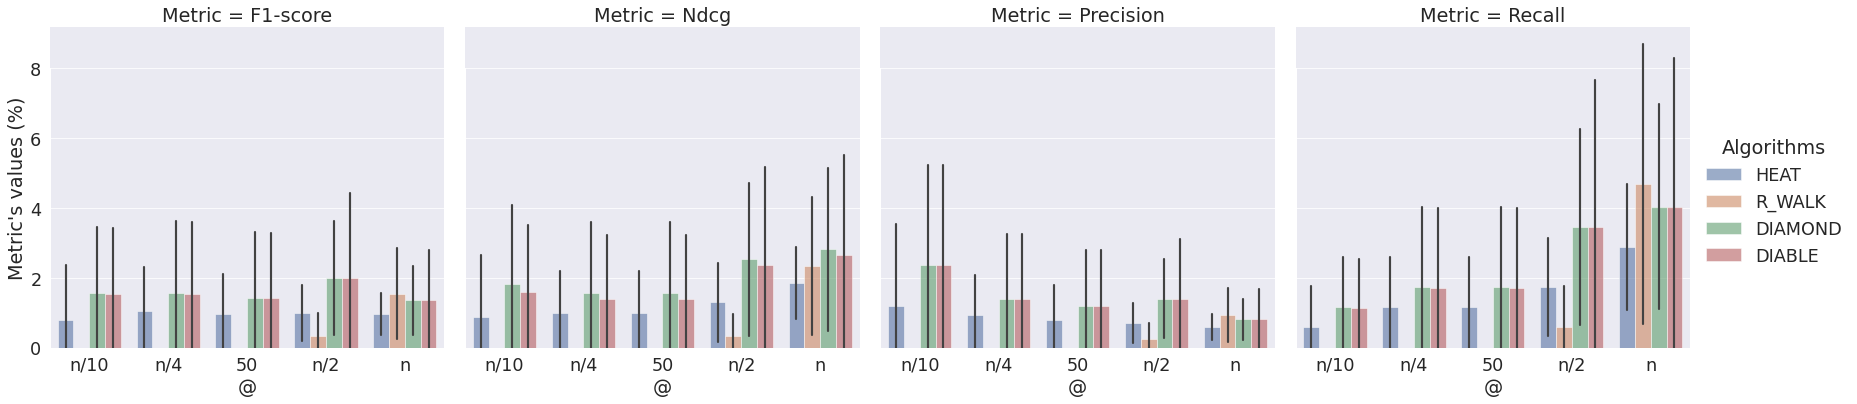

In [14]:
# C17, C20, C05
classes = 'C17_C20_C05'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[0]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C06, C25


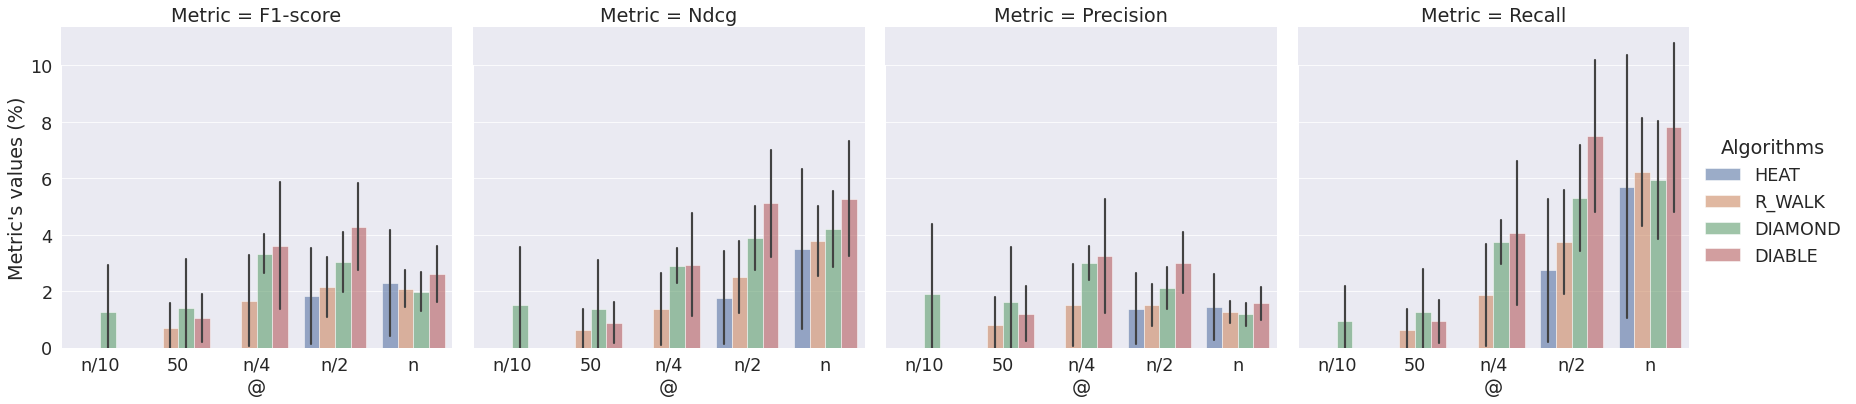

In [15]:
# C06, C25
classes = 'C06_C25'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[1]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C12


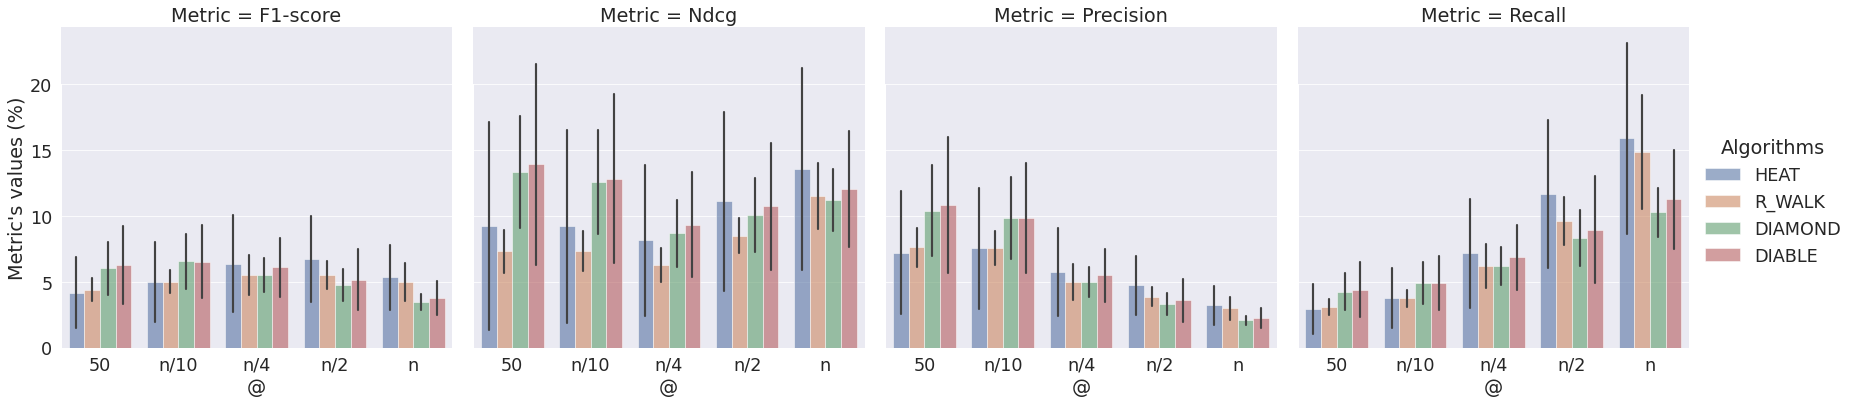

In [16]:
# C12
classes = 'C12'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[2]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C04


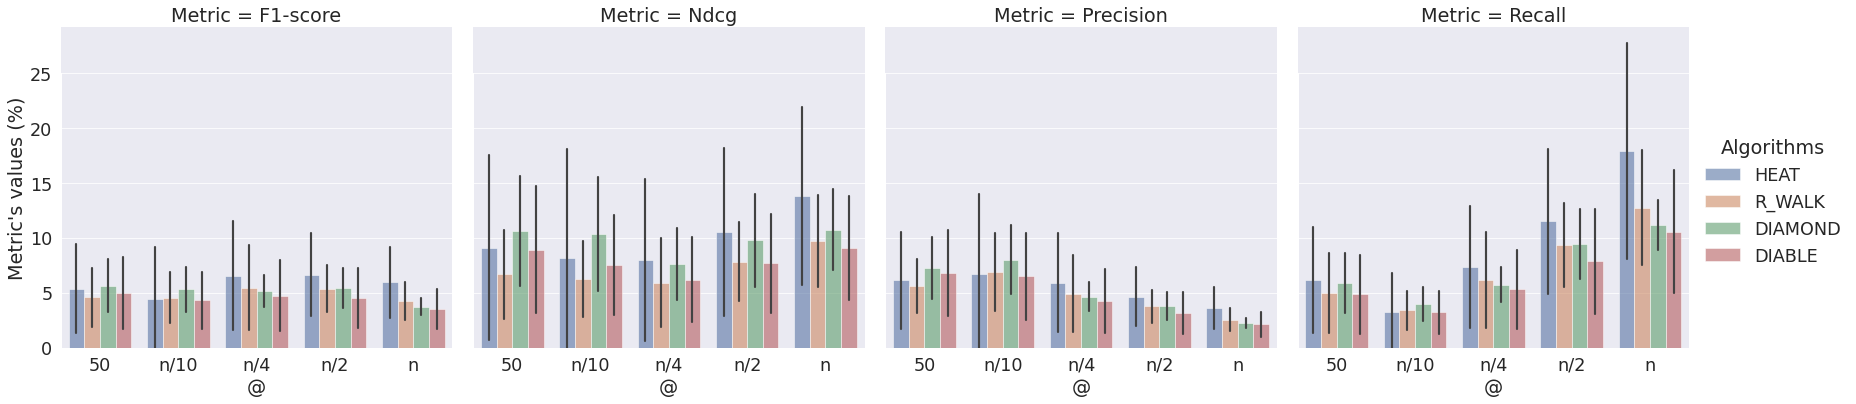

In [17]:
# C04
classes = 'C04'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[2], diseases[3]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)

# aggregate the values of the two diseases
df = aggregate_results(df_avg, df_std, how='mean')
algorithms = ['HEAT', 'R_WALK', 'DIAMOND', 'DIABLE']
df_avg = df[[f'{alg}_avg' for alg in algorithms]].rename(columns={f'{alg}_avg':f'{alg}' for alg in algorithms}).reset_index()
df_std = df[[f'{alg}_std' for alg in algorithms]].rename(columns={f'{alg}_std':f'{alg}' for alg in algorithms}).reset_index()

# plot
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C13, C19


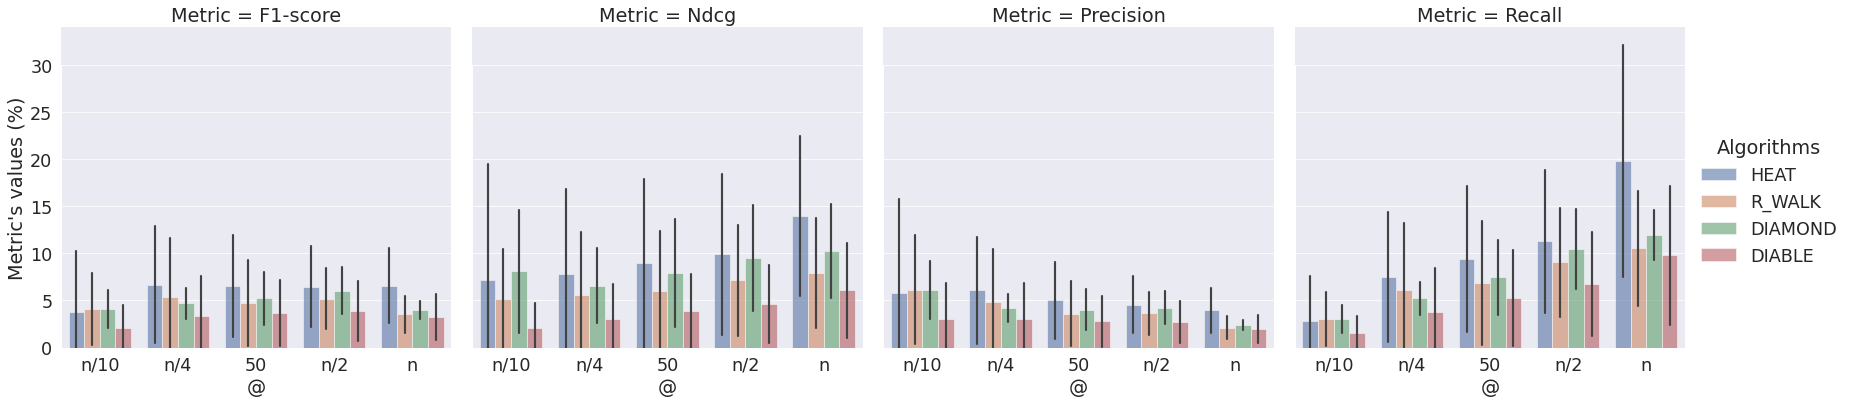

In [18]:
# C13, C19
classes = 'C13_C19'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[3]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C23, C10, F03, F01


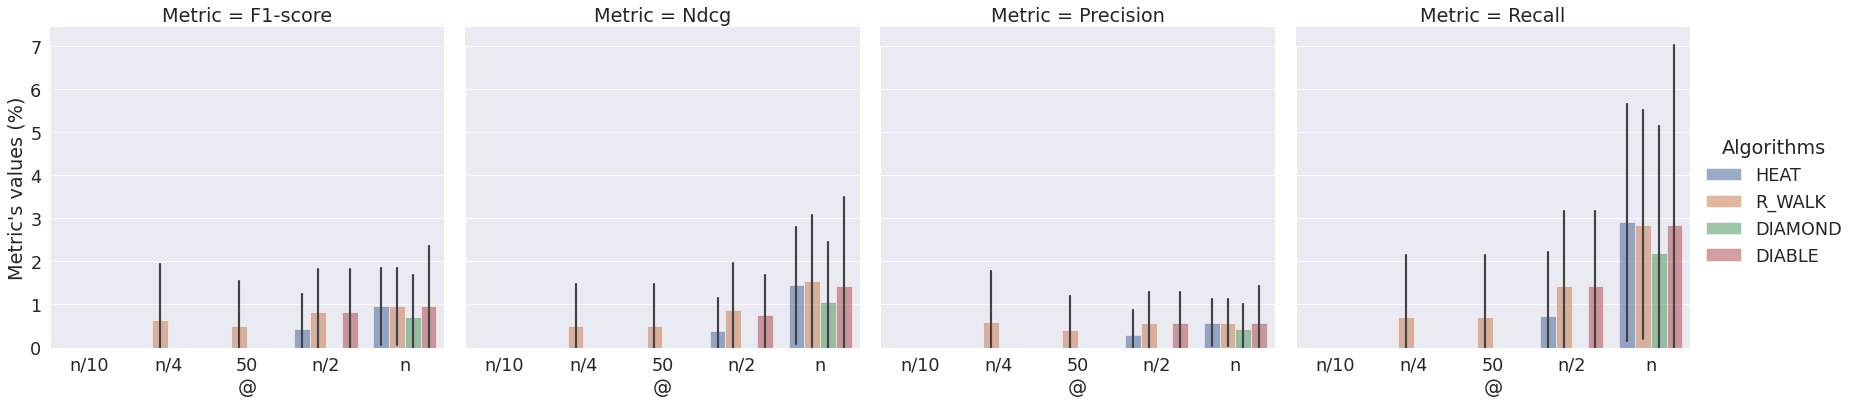

In [19]:
# C23, C10, F03, F01
classes = 'C23_C10_F03_F01'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[4]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: average


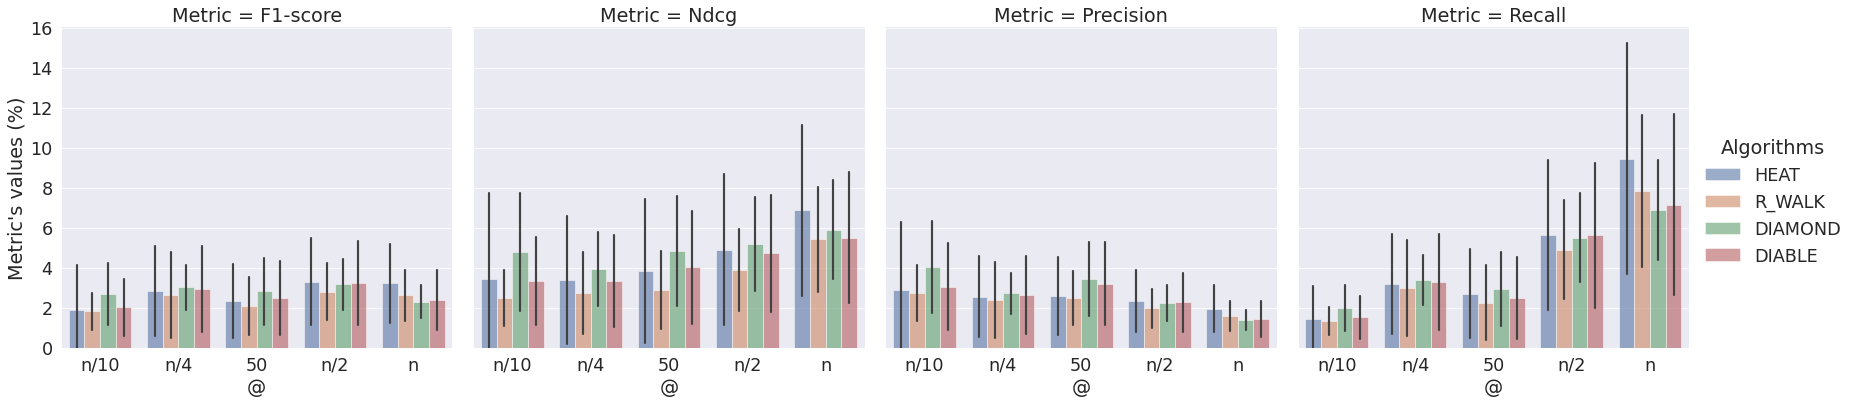

In [20]:
# Average
classes = 'average'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res(diseases)
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)

# aggregate the values of the two diseases
df = aggregate_results(df_avg, df_std, how='mean')
algorithms = ['HEAT', 'R_WALK', 'DIAMOND', 'DIABLE']
df_avg = df[[f'{alg}_avg' for alg in algorithms]].rename(columns={f'{alg}_avg':f'{alg}' for alg in algorithms}).reset_index()
df_std = df[[f'{alg}_std' for alg in algorithms]].rename(columns={f'{alg}_std':f'{alg}' for alg in algorithms}).reset_index()

# plot
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False)
plt.savefig('data/results/imgs/%s.png' % (classes))

### Extended results' visualization

In [21]:
metrics = ['F1-score', 'Ndcg']

Classes: C17, C20, C05-ext


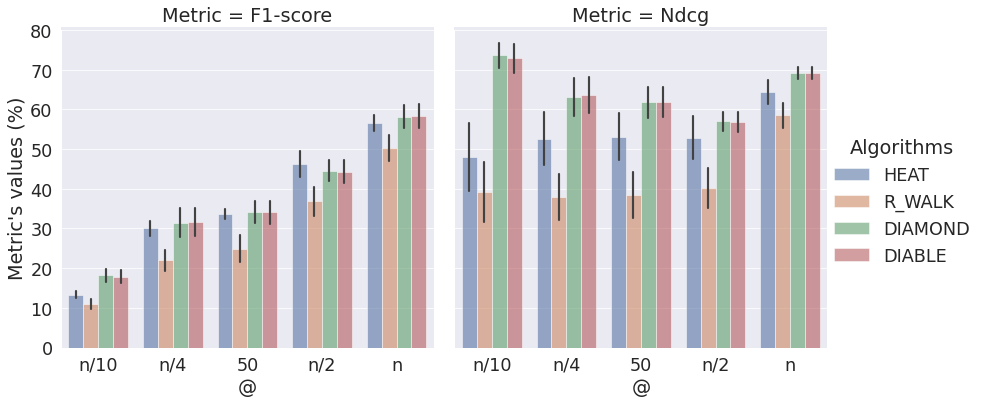

In [22]:
# C17, C20, C05
classes = 'C17_C20_C05-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[0]], normal_extended=(False, True))
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C06, C25-ext


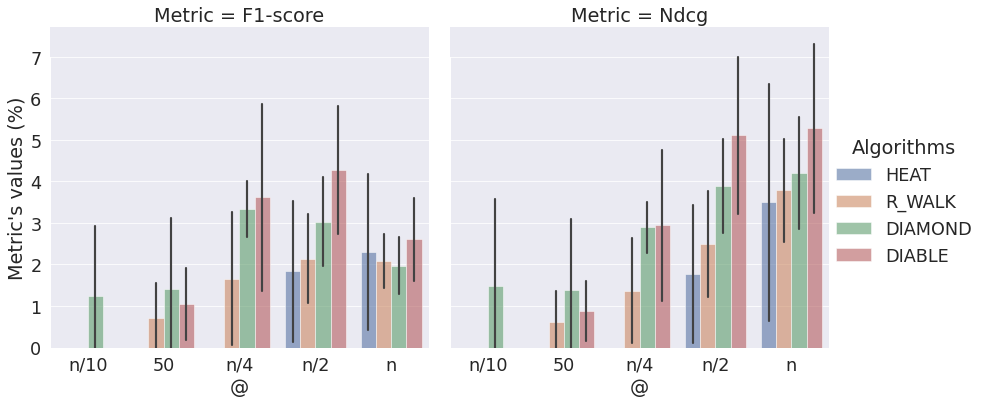

In [23]:
# C06, C25
classes = 'C06_C25-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[1]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C12-ext


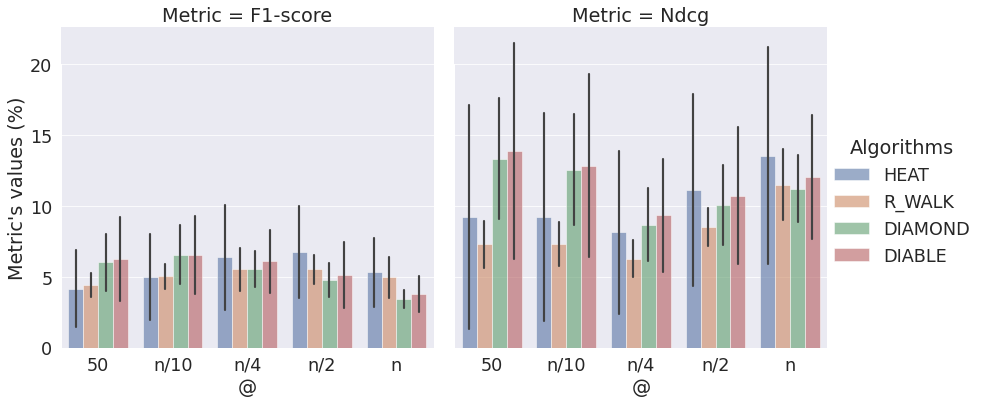

In [24]:
# C12
classes = 'C12-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[2]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C04-ext


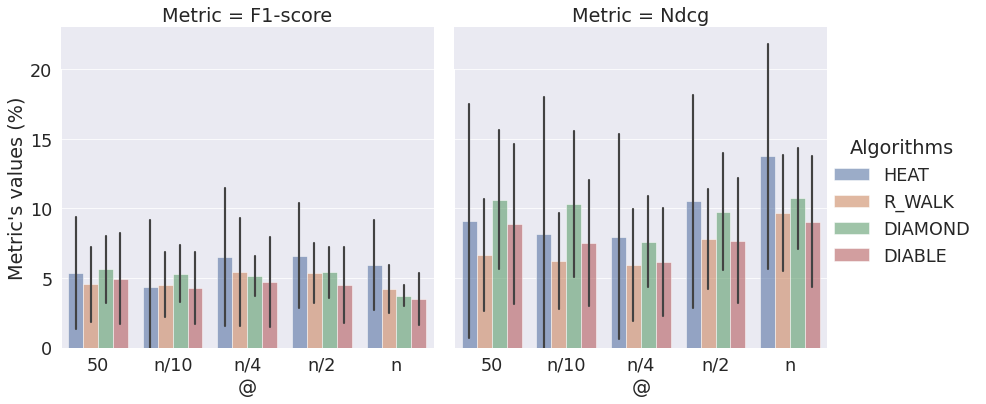

In [25]:
# C04
classes = 'C04-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[2], diseases[3]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)

# aggregate the values of the two diseases
df = aggregate_results(df_avg, df_std, how='mean')
algorithms = ['HEAT', 'R_WALK', 'DIAMOND', 'DIABLE']
df_avg = df[[f'{alg}_avg' for alg in algorithms]].rename(columns={f'{alg}_avg':f'{alg}' for alg in algorithms}).reset_index()
df_std = df[[f'{alg}_std' for alg in algorithms]].rename(columns={f'{alg}_std':f'{alg}' for alg in algorithms}).reset_index()

# plot
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C13, C19-ext


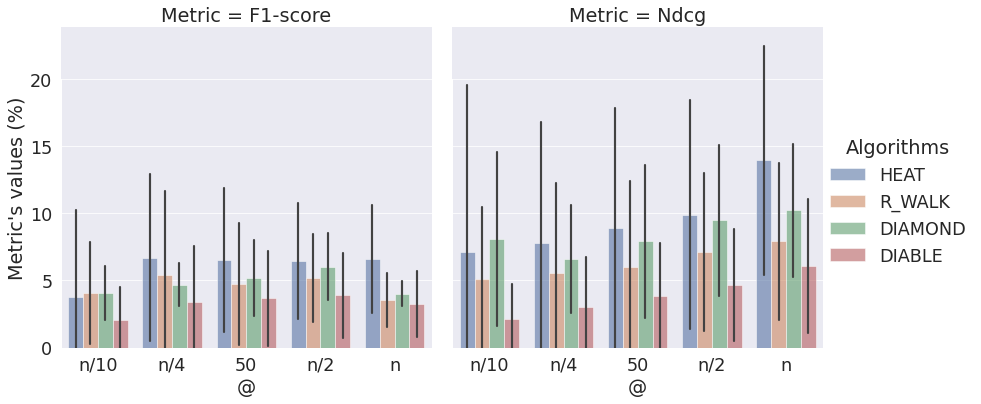

In [26]:
# C13, C19
classes = 'C13_C19-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[3]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: C23, C10, F03, F01-ext


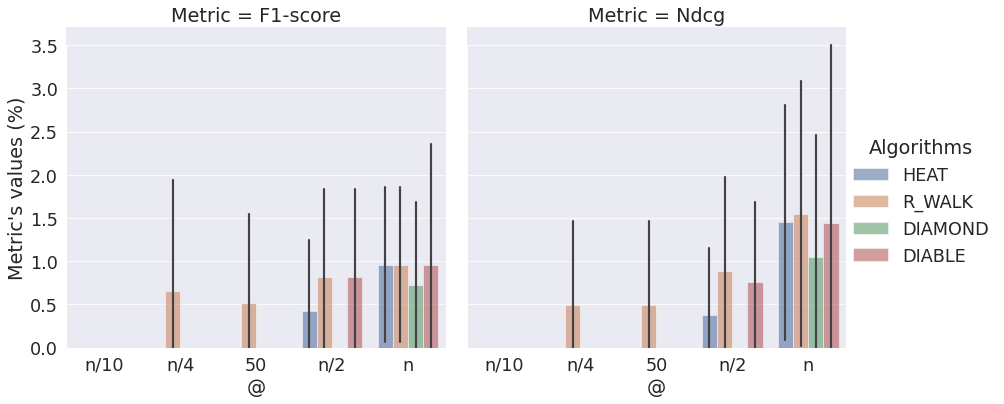

In [27]:
# C23, C10, F03, F01
classes = 'C23_C10_F03_F01-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res([diseases[4]])
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

Classes: average-ext


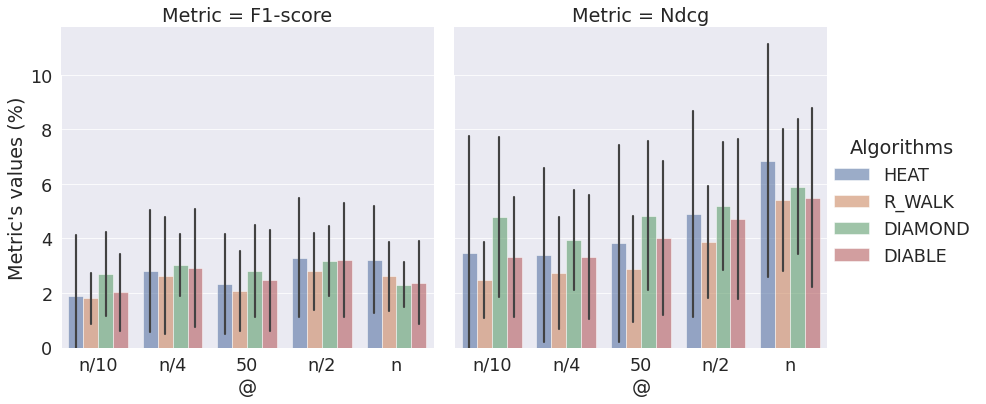

In [28]:
# Average
classes = 'average-ext'
print('Classes: %s' % (classes.replace('_', ', ')))
df_avg, df_std = get_avg_std_res(diseases)
df_avg = replace_cutoff_symbol(df_avg)
df_std = replace_cutoff_symbol(df_std)

# aggregate the values of the two diseases
df = aggregate_results(df_avg, df_std, how='mean')
algorithms = ['HEAT', 'R_WALK', 'DIAMOND', 'DIABLE']
df_avg = df[[f'{alg}_avg' for alg in algorithms]].rename(columns={f'{alg}_avg':f'{alg}' for alg in algorithms}).reset_index()
df_std = df[[f'{alg}_std' for alg in algorithms]].rename(columns={f'{alg}_std':f'{alg}' for alg in algorithms}).reset_index()

# plot
df = aggregate_results(df_avg, df_std, how='+-std')
plot_res(df, drop_index=False, metrics=metrics)
plt.savefig('data/results/imgs/%s.png' % (classes))

### Results to $\LaTeX$

In [78]:
## save the results in a longtable

df_list = []
df_std_list = []

classes = {
    0:'C17, C20, C05',
    1:'C06, C25',
    2:'C12',
    3:'C13, C19',
    4:'C23, C10, F03, F01',
    5:'C04',
    6:'average'
}

for k, disease in enumerate(list(diseases) + [[diseases[2], diseases[3]]] + [list(diseases)]):
    if isinstance(disease, list):
        df_avg, df_std = get_avg_std_res(disease, normal_extended=(True, True))
    else:
        df_avg, df_std = get_avg_std_res([disease], normal_extended=(True, True))
    df_avg = replace_cutoff_symbol(df_avg)
    df_std = replace_cutoff_symbol(df_std)
    df_list.append(pd.concat({classes[k]:aggregate_results(df_avg, df_std, how='str')}))

df_final = pd.concat(df_list)

In [79]:
print_latex(df_final)